In [ ]:
library(ggplot2)
library(ggrepel)
library(ggthemes)
library(scales)
library(ggh4x)
library(gtable)
library(grid)

In [ ]:
library(extrafont)
# font_import()
loadfonts(device="postscript")
loadfonts(device="pdf")

In [3]:
ThemePublication <- function(base_size = 14, base_family = "Helvetica") {
      theme_foundation(base_size = base_size, base_family = base_family) +
      # theme_bw() +
      theme(plot.title = element_text(
                  # face = "bold", size = rel(1.2), hjust = 0.5
                  size = rel(1.2), hjust = 0.5, family= base_family, colour="#262626", vjust=3
            ),
            text = element_text(family=base_family, size=14, colour="#262626"),
            panel.background = element_rect(colour = NA),
            plot.background = element_rect(colour = NA),
            # panel.border = element_rect(colour = "#d2d3d5"),
            panel.border = element_rect(colour = NA),
            # axis.title = element_text(face = "bold", size = rel(1)),
            axis.title = element_text(size = rel(1), colour="#262626"),
            axis.title.y = element_text(angle = 90, vjust = 2, colour="#262626"),
            axis.title.x = element_text(vjust = -0.2, colour="#262626"),
            axis.text = element_text(colour="#262626"), 
            # axis.line = element_line(colour = "#595757"),
            axis.line = element_line(colour = "#262626"),
            axis.ticks = element_line(colour="#262626"),
            # panel.grid.major = element_line(colour = "#d2d3d5"),
            panel.grid.major = element_line(colour = "#f2f3f5"),
            panel.grid.minor = element_blank(),
            legend.key = element_rect(colour = NA),
            legend.position = "bottom",
            legend.direction = "horizontal",
            legend.key.size= unit(0.5, "cm"),
            legend.spacing = unit(0, "cm"),
            legend.title = element_text(face = "italic", colour="#262626"),
            plot.margin = unit(c(10,5,5,5),"mm"),
            # strip.background = element_rect(
            #       colour = "#d2d3d5", fill = "#d2d3d5"
            # ),
            strip.background = element_blank(),
            # strip.text = element_text(face = "bold")
            # strip.text = element_blank()#element_text(colour="#262626")
            # #f0f0f0
      )
}

ScalePublication <- function(ngroups = 3, ...){
      # colours <- hue_pal()(ngroups)
      colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[seq(ngroups)]
      # discrete_scale("color", "Publication", manual_pal(values = colours), ...)
      discrete_scale(
            "fill", "Publication", manual_pal(values = alpha(colours, 0.4)), ...
      )
}
ScalePublication12 <- function(colours, ...){
      # colours <- hue_pal()(ngroups)
      # colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[seq(ngroups)]
      # discrete_scale("color", "Publication", manual_pal(values = colours), ...)
      discrete_scale(
            "fill", "Publication", manual_pal(values = alpha(colours, 0.4)), ...
      )
}
ScalePublication13 <- function(colours, ...){
      # colours <- hue_pal()(ngroups)
      # colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[seq(ngroups)]
      # discrete_scale("color", "Publication", manual_pal(values = colours), ...)
      discrete_scale(
            "label", "Publication", manual_pal(values = alpha(colours, 0.4)), ...
      )
}
ScalePublication2 <- function(ngroups = 3, ...){
      # colours <- hue_pal()(ngroups)
      colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[seq(ngroups)]
      discrete_scale("color", "Publication", manual_pal(values = colours), ...)
}
ScalePublication22 <- function(colours, ...){
      # colours <- hue_pal()(ngroups)
      # colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[seq(ngroups)]
      discrete_scale("color", "Publication", manual_pal(values = colours), ...)
}

ScalePublication3 <- function(remove, ...){
      # colours <- hue_pal()(ngroups)
      colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[-1 - remove]
      # discrete_scale("color", "Publication", manual_pal(values = colours), ...)
      discrete_scale(
            "fill", "Publication", manual_pal(values = alpha(colours, 0.7)), ...
      )
}
ScalePublication4 <- function(remove, ...){
      # colours <- hue_pal()(ngroups)
      colours <- c('#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd')[-1 - remove]
      # discrete_scale("color", "Publication", manual_pal(values = colours), ...)
      discrete_scale(
            "colour", "Publication", manual_pal(values = colours), ...
      )
}

TransparentBackground <- function(remove.grid = TRUE,...){
      #https://www.r-bloggers.com/2022/07/ggplot2-transparent-background-quick-guide/
      a <- theme(
            panel.background = element_rect(fill = 'transparent'), #transparent panel bg
            plot.background = element_rect(fill = 'transparent', color=NA), #transparent plot bg
            # legend.background = element_rect(fill='transparent'), #transparent legend bg
            # legend.box.background = element_rect(fill='transparent') #transparent legend panel
            legend.background = element_blank(),
            legend.key = element_blank()
      )
      if (remove.grid) {
            a <- a + theme(
                  panel.grid.major.x = element_blank(), #remove major gridlines
                  panel.grid.minor = element_blank() #remove minor gridlines
            )
      }

      a
}

# https://rpubs.com/Koundy/71792
# http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization
# https://stackoverflow.com/questions/14604439/plot-multiple-boxplot-in-one-graph
# https://r-graph-gallery.com/ggplot2-color.html
# http://rstudio-pubs-static.s3.amazonaws.com/5312_98fc1aba2d5740dd849a5ab797cc2c8d.html

In [8]:
df <- read.csv("CIFAR10_1CC.csv")
df[seq(1, 5),]

,method,origin,AUC_Plane,AUC_Car,AUC_Bird,AUC_Cat,AUC_Deer,AUC_Dog,AUC_Frog,AUC_Horse,AUC_Ship,AUC_Truck,AUC_Mean,year,category
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,CutPaste,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.4,2021,[localisation]
2,SimpleNet,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.5,2023,[localisation]
3,DROC,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.5,2021,[pose_bias]
4,AnoGAN,UniCon-HA,67.1,54.7,52.9,54.5,65.1,60.3,58.5,62.5,75.8,66.5,61.8,2017,[other]
5,Geom,UniCon-HA,74.7,95.7,78.1,72.4,87.8,87.8,83.4,95.5,93.3,91.3,86.0,2018,[pose_bias]


In [9]:
tr <- list('pose_bias'=1, 'other'=3, 'ours'=3)
tr2 <- list('pose_bias'='Rotation-based', 'other'="Baselines", 'ours'="Ours")

df$category2 <- sapply(df[, 15], function (x) as.integer(tr[substr(x, 2, nchar(x) - 1)]))
df$category3 <- sapply(df[, 15], function (x) as.character(tr2[substr(x, 2, nchar(x) - 1)]))

df$year2 <- as.factor(df$year)
df$AUC_Mean <- sapply(df[, 13], function (x) x / 100)
df

method,origin,AUC_Plane,AUC_Car,AUC_Bird,AUC_Cat,AUC_Deer,AUC_Dog,AUC_Frog,AUC_Horse,AUC_Ship,AUC_Truck,AUC_Mean,year,category,category2,category3,year2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<fct>
CutPaste,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6940,2021,[localisation],3,Localisation,2021
SimpleNet,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8650,2023,[localisation],3,Localisation,2023
DROC,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9250,2021,[pose_bias],1,Rotation-based,2021
AnoGAN,UniCon-HA,67.1,54.7,52.9,54.5,65.1,60.3,58.5,62.5,75.8,66.5,0.6180,2017,[other],3,Baselines,2017
Geom,UniCon-HA,74.7,95.7,78.1,72.4,87.8,87.8,83.4,95.5,93.3,91.3,0.8600,2018,[pose_bias],1,Rotation-based,2018
Rot,UniCon-HA,78.3,94.3,86.2,80.8,89.4,89.0,88.9,95.1,92.3,89.7,0.8840,2019,[pose_bias],1,Rotation-based,2019
Rot+Trans,UniCon-HA,80.4,96.4,85.9,81.1,91.3,89.6,89.9,95.9,95.0,92.6,0.8980,2019,[pose_bias],1,Rotation-based,2019
GOAD,UniCon-HA,75.5,94.1,81.8,72.0,83.7,84.4,82.9,93.9,92.9,89.5,0.8510,2020,[pose_bias],1,Rotation-based,2020
CSI,UniCon-HA,89.9,99.1,93.1,86.4,93.9,93.2,95.1,98.7,97.9,95.5,0.9430,2020,[pose_bias],1,Rotation-based,2020


In [10]:
df[[1]][27] <- 'Ours'

df <- df[0:27, ]

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


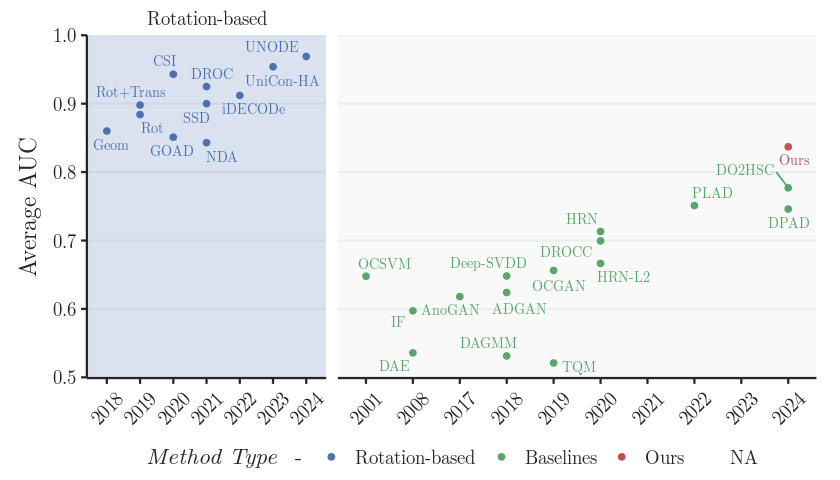

In [11]:
legend.title <- "Method Type"
levels <- c("Rotation-based", "Baselines", "Ours")

colours <- c("#4c72b0", "#55a868", "#c44e52")
df$category3 <- factor(df$category3, levels = levels)
df$category2 <- factor(df$category2, labels= c("Rotation-based", ""))
p <- ggplot(df, aes(x=year2, y=AUC_Mean, col=category3)) +
     geom_point() +
     geom_text_repel(aes(label = method, family="LM Roman 10", fontface="plain"), size = 3, show.legend = FALSE) +
     facet_wrap(~category2, nrow=1, scales="free_x") + 
     ThemePublication(base_family="LM Roman 10") + TransparentBackground() +
     ScalePublication22(colours, labels=levels) +
     ylab("Average AUC") + xlab("") +
     scale_y_continuous(expand=c(0, .001), limits=c(0.5, .999)) +
     labs(color =  paste0(legend.title, "  - ")) +
     theme(axis.text.x = element_text(angle=45, vjust = 0.5), legend.key.size = unit(0.5, "cm"), legend.position = c(0.5, -0.23)) +
     guides(color = guide_legend(nrow=1))

g <- ggplot_gtable(ggplot_build(p))
alpha_ <- 0.05
fills <- c(alpha("#4c72b0", 0.2), alpha("#8c8c8c", alpha_))
stripr <- which(grepl('panel', g$layout$name))
k <- 1
for (i in stripr) {
  j <- which(grepl('rect', g$grobs[[i]]$childrenOrder))
  g$grobs[[i]]$children[[j]]$gp$fill <- fills[k]
  k <- k+1
}
g$widths[5] <- g$widths[5] * 1
g$widths[7] <- g$widths[7] * 0.5
g$heights[1] <- g$heights[1] * 0

options(repr.plot.width = NULL, repr.plot.height = 4)
grid.draw(g)

In [13]:
ggsave(paste0("compare-tight.pdf"), g, , bg='transparent',height = 4)

Saving 6.67 x 4 in image
